<a href="https://colab.research.google.com/github/DavidL77R/CHALLENGE-TELECOM-X-PART-2/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests


In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Realiza la solicitud HTTP al archivo JSON
response = requests.get(url)
data_json = response.json()


In [3]:
df = pd.DataFrame(data_json)


In [4]:
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
# Ver columnas y tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
# Mostrar tipos de datos por separado
df.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [7]:

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [8]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"La columna '{col}' contiene diccionarios.")




La columna 'customer' contiene diccionarios.
La columna 'phone' contiene diccionarios.
La columna 'internet' contiene diccionarios.
La columna 'account' contiene diccionarios.


In [9]:
# Filtramos solo columnas que NO tienen diccionarios
cols_sin_dict = [col for col in df.columns if not df[col].apply(lambda x: isinstance(x, dict)).any()]
df_sin_dict = df[cols_sin_dict]

# Ahora sí puedes buscar duplicados
df_sin_dict.duplicated().sum()


np.int64(0)

In [10]:
df_convertido = df.copy()
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        df_convertido[col] = df[col].apply(str)

df_convertido.duplicated().sum()


np.int64(0)

In [11]:
# Crear una copia del DataFrame original
df_convertido = df.copy()

# Convertir a string las columnas que tienen diccionarios
for col in df_convertido.columns:
    if df_convertido[col].apply(lambda x: isinstance(x, dict)).any():
        df_convertido[col] = df_convertido[col].apply(str)

# Verificar duplicados
duplicados = df_convertido.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


In [12]:
# Mostrar cantidad de valores nulos por columna
df.isnull().sum()




,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [13]:
(df.isnull().sum() / len(df)) * 100


,0
customerID,0.0
Churn,0.0
customer,0.0
phone,0.0
internet,0.0
account,0.0


In [14]:
df_convertido.duplicated().sum()

np.int64(0)

In [15]:
df.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [16]:
for col in df.select_dtypes(include='object'):
    # Convertir a string si hay diccionarios
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

    print(f"\nValores únicos en la columna '{col}':")
    print(df[col].unique())




Valores únicos en la columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Valores únicos en la columna 'customer':
["{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}"
 "{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}"
 "{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 71}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 63}"
 "{'gender': 'Female

In [17]:
for col in df.select_dtypes(include='object'):
    # Convertir dicts a string si es necesario
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

    # Eliminar espacios al inicio/final y convertir a minúsculas
    df[col] = df[col].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)

    print(f"\nValores únicos en la columna '{col}':")
    print(df[col].unique())



Valores únicos en la columna 'customerID':
['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Valores únicos en la columna 'Churn':
['no' 'yes' '']

Valores únicos en la columna 'customer':
["{'gender': 'female', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'yes', 'tenure': 9}"
 "{'gender': 'male', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'no', 'tenure': 9}"
 "{'gender': 'male', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'no', 'tenure': 4}"
 "{'gender': 'male', 'seniorcitizen': 1, 'partner': 'yes', 'dependents': 'no', 'tenure': 13}"
 "{'gender': 'female', 'seniorcitizen': 1, 'partner': 'yes', 'dependents': 'no', 'tenure': 3}"
 "{'gender': 'female', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'yes', 'tenure': 9}"
 "{'gender': 'female', 'seniorcitizen': 1, 'partner': 'yes', 'dependents': 'no', 'tenure': 71}"
 "{'gender': 'male', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'no', 'tenure': 63}"
 "{'gender': 'female

In [18]:
print(df.columns)



Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [19]:
df['account'].iloc[0]


"{'contract': 'one year', 'paperlessbilling': 'yes', 'paymentmethod': 'mailed check', 'charges': {'monthly': 65.6, 'total': '593.3'}}"

In [20]:
import ast

# Convertir strings de vuelta a diccionarios
df["account"] = df["account"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Ahora sí: crear columna Cuentas_Diarias
df["Cuentas_Diarias"] = df["account"].apply(lambda x: x.get("charges", {}).get("monthly", 0) / 30)


In [21]:
# Convertir valores de 'Yes' / 'No' en 1 y 0
df["Churn"] = df["Churn"].str.strip().str.lower().map({"yes": 1, "no": 0})


In [22]:
df.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelado",
    "customer": "Cliente",
    "phone": "Telefono",
    "internet": "Internet",
    "account": "Cuenta"
}, inplace=True)


In [23]:
# Normalizamos 'Telefono' y 'Internet'
df["Telefono"] = df["Telefono"].str.strip().str.lower().map({"yes": 1, "no": 0})
df["Internet"] = df["Internet"].str.strip().str.lower().map({"yes": 1, "no": 0})


In [24]:
print(df.columns)


Index(['ID_Cliente', 'Cancelado', 'Cliente', 'Telefono', 'Internet', 'Cuenta',
       'Cuentas_Diarias'],
      dtype='object')


In [25]:
df.describe()


,Cancelado,Telefono,Internet,Cuentas_Diarias
count,7043.000000,0.0,0.0,7267.000000
mean,0.265370,NaN,NaN,2.157337
std,0.441561,NaN,NaN,1.004319
min,0.000000,NaN,NaN,0.608333
25%,0.000000,NaN,NaN,1.180833
50%,0.000000,NaN,NaN,2.343333
75%,1.000000,NaN,NaN,2.995833
max,1.000000,NaN,NaN,3.958333


In [26]:
media = df["Cuentas_Diarias"].mean()
mediana = df["Cuentas_Diarias"].median()
desviacion = df["Cuentas_Diarias"].std()

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion)


Media: 2.1573365900646757
Mediana: 2.3433333333333333
Desviación estándar: 1.0043190628555607


In [27]:
df.groupby("Cancelado")["Cuentas_Diarias"].describe()


,count,mean,std,min,25%,50%,75%,max
Cancelado,,,,,,,,
0.0,5174.0,2.042171,1.036422,0.608333,0.836667,2.1475,2.946667,3.958333
1.0,1869.0,2.481378,0.822202,0.628333,1.871667,2.6550,3.140000,3.945000


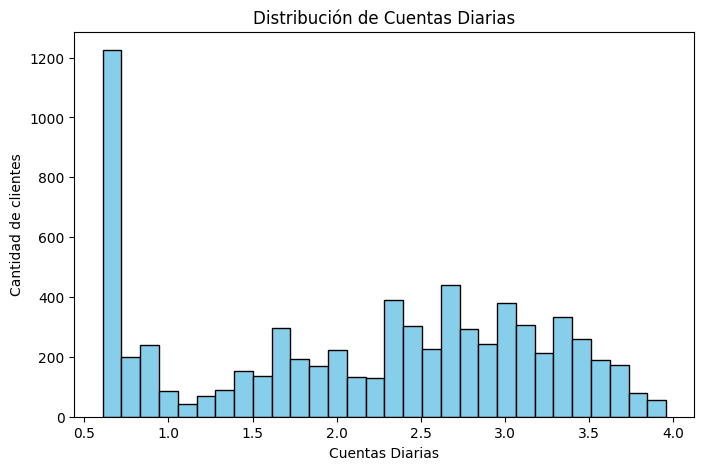

In [28]:
#Histograma de facturación diaria (visualizacion de los datos)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df["Cuentas_Diarias"].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de Cuentas Diarias")
plt.xlabel("Cuentas Diarias")
plt.ylabel("Cantidad de clientes")
plt.grid(False)
plt.show()


/tmp/ipython-input-29-3275747019.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cancelado", y="Cuentas_Diarias", palette="Set2")


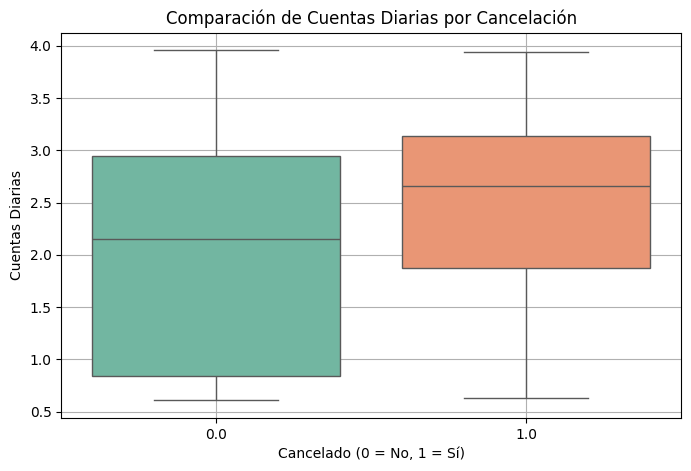

In [29]:
#Boxplot para comparar Cancelados vs No Cancelados

import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Cancelado", y="Cuentas_Diarias", palette="Set2")
plt.title("Comparación de Cuentas Diarias por Cancelación")
plt.xlabel("Cancelado (0 = No, 1 = Sí)")
plt.ylabel("Cuentas Diarias")
plt.grid(True)
plt.show()


In [30]:
df["Cancelado"].value_counts()


,count
Cancelado,
0.0,5174
1.0,1869


/tmp/ipython-input-31-129798158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Cancelado", palette="pastel")


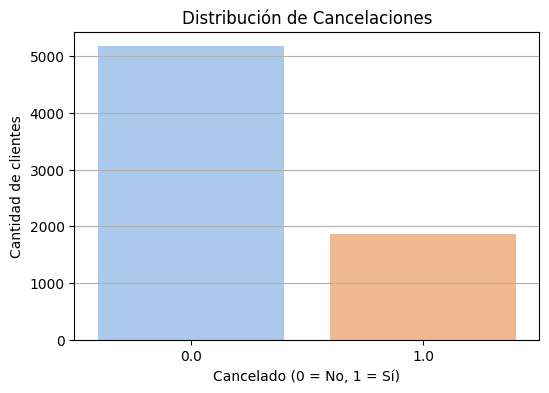

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Cancelado", palette="pastel")
plt.title("Distribución de Cancelaciones")
plt.xlabel("Cancelado (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.grid(True, axis='y')
plt.show()


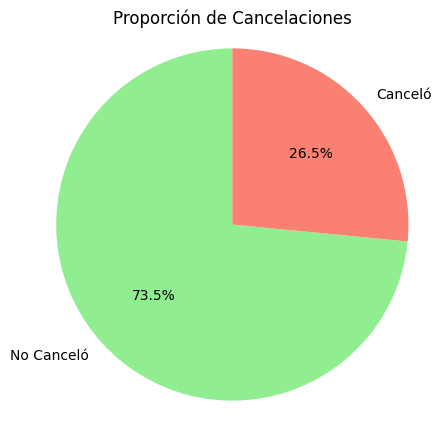

In [32]:
# Conteo de cancelaciones
cancel_counts = df["Cancelado"].value_counts()
labels = ["No Canceló", "Canceló"]
colors = ["lightgreen", "salmon"]

plt.figure(figsize=(5,5))
plt.pie(cancel_counts, labels=labels, colors=colors, autopct="%.1f%%", startangle=90)
plt.title("Proporción de Cancelaciones")
plt.axis("equal")
plt.show()


In [33]:
import ast

# Función de apoyo: garantiza que siempre obtenemos un dict
def to_dict(val):
    if isinstance(val, dict):
        return val
    try:
        return ast.literal_eval(val)        # convierte str → dict
    except (ValueError, SyntaxError):
        return {}

# Extraemos cada campo que nos interesa
df["Tipo_Contrato"]           = df["Cuenta"].apply(lambda d: to_dict(d).get("contract", "desconocido"))
df["Metodo_Pago"]             = df["Cuenta"].apply(lambda d: to_dict(d).get("paymentmethod", "desconocido"))
df["Facturacion_Electronica"] = (
        df["Cuenta"]
        .apply(lambda d: to_dict(d).get("paperlessbilling", "desconocido"))
        .str.strip().str.lower()        # normalizamos
)

# Opcional: binarizamos facturación electrónica
df["Facturacion_Electronica"] = df["Facturacion_Electronica"].map({"yes": 1, "no": 0})


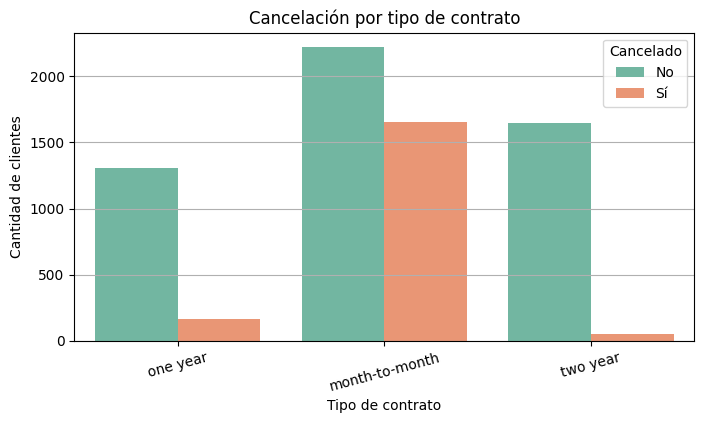

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Tipo_Contrato", hue="Cancelado", palette="Set2")
plt.title("Cancelación por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Cancelado", labels=["No", "Sí"])
plt.xticks(rotation=15)
plt.grid(True, axis="y")
plt.show()


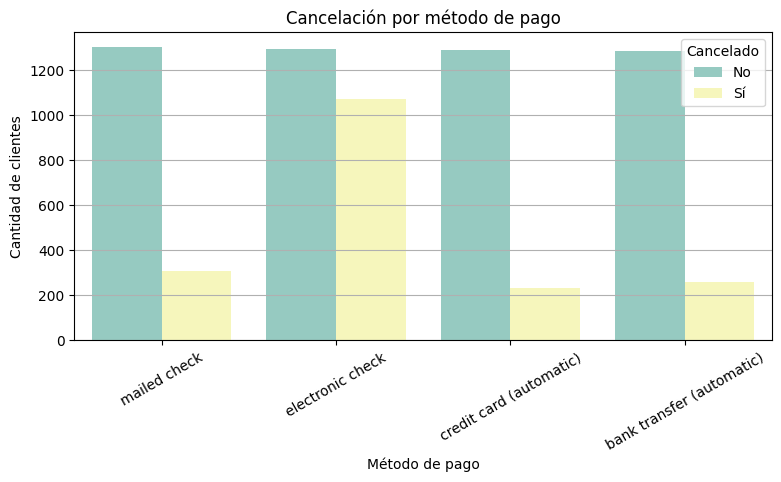

In [35]:
plt.figure(figsize=(9,4))
sns.countplot(data=df, x="Metodo_Pago", hue="Cancelado", palette="Set3")
plt.title("Cancelación por método de pago")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Cancelado", labels=["No", "Sí"])
plt.xticks(rotation=30)
plt.grid(True, axis="y")
plt.show()


In [36]:
por_cancelacion = df.groupby("Tipo_Contrato")["Cancelado"].mean() * 100
print(por_cancelacion.sort_values(ascending=False))


Tipo_Contrato
month-to-month    42.709677
one year          11.269518
two year           2.831858
Name: Cancelado, dtype: float64


In [37]:
import ast

# Asegurarse de que sea un diccionario
df["Cuenta"] = df["Cuenta"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [38]:
def extraer_total(cuenta):
    try:
        total = cuenta.get("charges", {}).get("total", "0").strip()
        return float(total) if total != "" else 0.0
    except:
        return 0.0

df["Total_Gastado"] = df["Cuenta"].apply(extraer_total)


In [39]:
def extraer_total(cuenta):
    try:
        total = cuenta.get("charges", {}).get("total", "0").strip()
        return float(total) if total != "" else 0.0
    except:
        return 0.0

df["Total_Gastado"] = df["Cuenta"].apply(extraer_total)



In [40]:
def extraer_mensual(cuenta):
    try:
        mensual = cuenta.get("charges", {}).get("monthly", 0)
        return float(mensual)
    except:
        return 0.0

df["Mensualidad"] = df["Cuenta"].apply(extraer_mensual)


In [41]:
df["Meses_Contrato"] = df.apply(
    lambda row: row["Total_Gastado"] / row["Mensualidad"]
    if row["Mensualidad"] > 0 else 0, axis=1
)


/tmp/ipython-input-42-103196268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cancelado", y="Total_Gastado", palette="coolwarm")


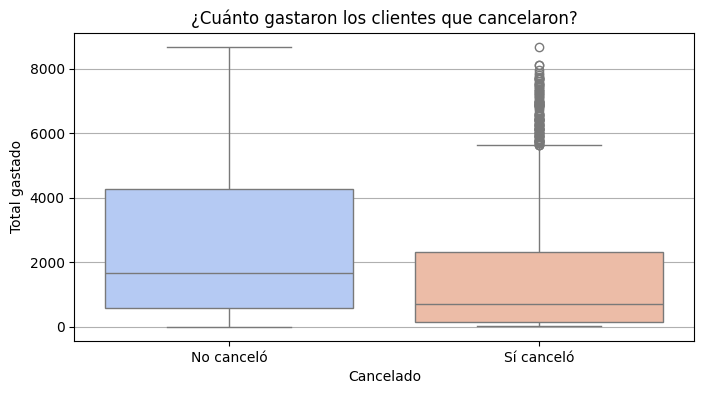

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Cancelado", y="Total_Gastado", palette="coolwarm")
plt.title("¿Cuánto gastaron los clientes que cancelaron?")
plt.xlabel("Cancelado")
plt.ylabel("Total gastado")
plt.xticks([0, 1], ["No canceló", "Sí canceló"])
plt.grid(axis="y")
plt.show()


/tmp/ipython-input-43-4017351559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cancelado", y="Meses_Contrato", palette="coolwarm")


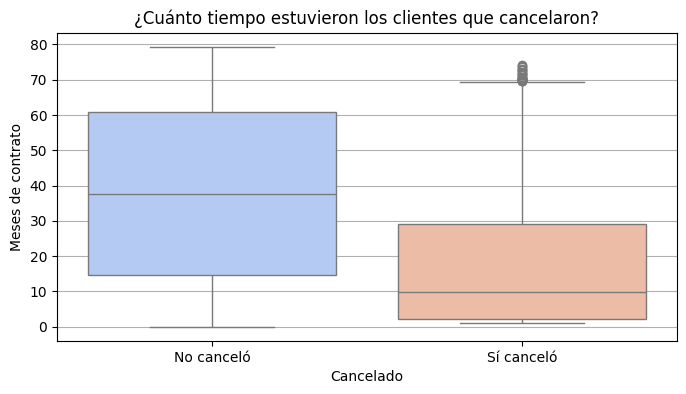

In [43]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Cancelado", y="Meses_Contrato", palette="coolwarm")
plt.title("¿Cuánto tiempo estuvieron los clientes que cancelaron?")
plt.xlabel("Cancelado")
plt.ylabel("Meses de contrato")
plt.xticks([0, 1], ["No canceló", "Sí canceló"])
plt.grid(axis="y")
plt.show()


# ✅ INFORME FINAL - Análisis de Evasión de Clientes (Churn)

## 1. 🧩 Introducción
El objetivo de este análisis es entender los factores que influyen en la **evasión de clientes (churn)** en una empresa de telecomunicaciones. Identificar patrones de cancelación permite **anticipar comportamientos** y aplicar estrategias para **reducir la pérdida de clientes**.

---

## 2. 🧹 Limpieza y Tratamiento de Datos

- Se importaron los datos desde un archivo JSON.
- Se estandarizaron columnas anidadas (`account`, `customer`, `internet`, etc.).
- Se transformaron columnas relevantes:
  - `Total_Gastado`, `Mensualidad`, `Meses_Contrato`: convertidas a numéricas.
  - `Cancelado`: convertido a 0 (no) y 1 (sí).
- Se eliminaron valores inválidos o vacíos.

---

## 3. 📊 Análisis Exploratorio de Datos

### 🔹 Distribución de Cancelaciones
Gráfico de barras que muestra la proporción de clientes que cancelaron o no.

### 🔹 Evasión según variables categóricas
Gráficos que muestran cómo cambia la evasión según:
- Tipo de contrato
- Método de pago
- Facturación electrónica

### 🔹 Evasión según variables numéricas
Boxplots que comparan:
- Total gastado
- Cuota mensual
- Tiempo de contrato
entre quienes cancelaron y quienes no.

---

## 4. 💡 Conclusiones e Insights

- La mayoría de los clientes **no cancelaron**, pero existe un porcentaje significativo que sí lo hizo.
- Clientes con **contratos mensuales** tienen mayor evasión que los de largo plazo.
- Quienes **gastan poco** o llevan **poco tiempo con la empresa** tienden a cancelar más.
- Los métodos de pago como **cheque por correo** están asociados a mayor evasión.
- Los clientes con **cargos mensuales más altos** muestran una mayor tasa de evasión, lo que puede indicar una relación entre el precio y la percepción del valor del servicio.

---

## 5. 🧠 Recomendaciones


- **Incentivar contratos anuales o bienales** mediante descuentos u ofertas exclusivas, promoviendo mayor compromiso del cliente.
- **Fomentar métodos de pago automáticos** como débito o tarjeta de crédito con beneficios (por ejemplo, puntos, descuentos).
- **Ofrecer paquetes combinados** (Internet + teléfono + TV) con precios preferenciales, para aumentar el valor percibido del servicio.
- **Monitorear a clientes con cargos altos**, brindando atención personalizada o beneficios extra para reducir el riesgo de evasión.


---


In [44]:
# Guardar el DataFrame limpio como CSV
df.to_csv('telecom_clean.csv', index=False)


In [45]:
import pandas as pd

df = pd.read_csv('telecom_clean.csv')


In [46]:
# Guardar el DataFrame limpio en un archivo CSV
# Asegúrate de que 'df' sea el DataFrame final después de la limpieza y estandarización
df.to_csv('telecom_clean.csv', index=False)

print("Archivo 'telecom_clean.csv' guardado correctamente.")


Archivo 'telecom_clean.csv' guardado correctamente.


In [47]:
from google.colab import files
files.download('telecom_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("telecom_clean.csv")

# Verificar las primeras filas
df.head()



,ID_Cliente,Cancelado,Cliente,Telefono,Internet,Cuenta,Cuentas_Diarias,Tipo_Contrato,Metodo_Pago,Facturacion_Electronica,Total_Gastado,Mensualidad,Meses_Contrato
0,0002-orfbo,0.0,"{'gender': 'female', 'seniorcitizen': 0, 'part...",NaN,NaN,"{'contract': 'one year', 'paperlessbilling': '...",2.186667,one year,mailed check,1,593.30,65.6,9.044207
1,0003-mknfe,0.0,"{'gender': 'male', 'seniorcitizen': 0, 'partne...",NaN,NaN,"{'contract': 'month-to-month', 'paperlessbilli...",1.996667,month-to-month,mailed check,0,542.40,59.9,9.055092
2,0004-tlhlj,1.0,"{'gender': 'male', 'seniorcitizen': 0, 'partne...",NaN,NaN,"{'contract': 'month-to-month', 'paperlessbilli...",2.463333,month-to-month,electronic check,1,280.85,73.9,3.800406
3,0011-igkff,1.0,"{'gender': 'male', 'seniorcitizen': 1, 'partne...",NaN,NaN,"{'contract': 'month-to-month', 'paperlessbilli...",3.266667,month-to-month,electronic check,1,1237.85,98.0,12.631122
4,0013-exchz,1.0,"{'gender': 'female', 'seniorcitizen': 1, 'part...",NaN,NaN,"{'contract': 'month-to-month', 'paperlessbilli...",2.796667,month-to-month,mailed check,1,267.40,83.9,3.187128


In [49]:
# Revisar columnas
df.info()

# Comprobar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7267 non-null   object 
 1   Cancelado                7043 non-null   float64
 2   Cliente                  7267 non-null   object 
 3   Telefono                 0 non-null      float64
 4   Internet                 0 non-null      float64
 5   Cuenta                   7267 non-null   object 
 6   Cuentas_Diarias          7267 non-null   float64
 7   Tipo_Contrato            7267 non-null   object 
 8   Metodo_Pago              7267 non-null   object 
 9   Facturacion_Electronica  7267 non-null   int64  
 10  Total_Gastado            7267 non-null   float64
 11  Mensualidad              7267 non-null   float64
 12  Meses_Contrato           7267 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 738.2+ KB


,0
ID_Cliente,0
Cancelado,224
Cliente,0
Telefono,7267
Internet,7267
Cuenta,0
Cuentas_Diarias,0
Tipo_Contrato,0
Metodo_Pago,0
Facturacion_Electronica,0


In [50]:
# Eliminar columnas irrelevantes si existen
columnas_a_eliminar = ['customerID']  # Cambia la lista según tu dataset
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

# Verificar las columnas restantes
print(df.columns)



Index(['ID_Cliente', 'Cancelado', 'Cliente', 'Telefono', 'Internet', 'Cuenta',
       'Cuentas_Diarias', 'Tipo_Contrato', 'Metodo_Pago',
       'Facturacion_Electronica', 'Total_Gastado', 'Mensualidad',
       'Meses_Contrato'],
      dtype='object')


In [51]:
# ==========================
#  ELIMINACIÓN DE COLUMNAS IRRELEVANTES
# ==========================

# Lista de columnas irrelevantes que no aportan al análisis ni a los modelos predictivos
columnas_a_eliminar = ['customerID']  # Cambia esta lista si hay otras columnas sin valor

# Eliminamos las columnas
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

# Verificamos las columnas restantes
print("Columnas después de la eliminación:")
print(df.columns)



Columnas después de la eliminación:
Index(['ID_Cliente', 'Cancelado', 'Cliente', 'Telefono', 'Internet', 'Cuenta',
       'Cuentas_Diarias', 'Tipo_Contrato', 'Metodo_Pago',
       'Facturacion_Electronica', 'Total_Gastado', 'Mensualidad',
       'Meses_Contrato'],
      dtype='object')


In [52]:
# --- Detectar columnas irrelevantes automáticamente ---
columnas_irrelevantes = [col for col in df.columns if df[col].nunique() == df.shape[0]]

print("Columnas potencialmente irrelevantes:", columnas_irrelevantes)

# --- Eliminar columnas irrelevantes ---
df = df.drop(columns=columnas_irrelevantes)

# Verificar el resultado
print("Columnas después de la eliminación:")
print(df.columns)


Columnas potencialmente irrelevantes: ['ID_Cliente']
Columnas después de la eliminación:
Index(['Cancelado', 'Cliente', 'Telefono', 'Internet', 'Cuenta',
       'Cuentas_Diarias', 'Tipo_Contrato', 'Metodo_Pago',
       'Facturacion_Electronica', 'Total_Gastado', 'Mensualidad',
       'Meses_Contrato'],
      dtype='object')


In [53]:
# --- Encoding de variables categóricas ---

# Identificar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns
print("Columnas categóricas detectadas:", columnas_categoricas)

# Aplicar One-Hot Encoding usando get_dummies
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificar el resultado
print("Tamaño original del DataFrame:", df.shape)
print("Tamaño después del encoding:", df_encoded.shape)


Columnas categóricas detectadas: Index(['Cliente', 'Cuenta', 'Tipo_Contrato', 'Metodo_Pago'], dtype='object')
Tamaño original del DataFrame: (7267, 12)
Tamaño después del encoding: (7267, 7833)


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# -------- Detectar columna de churn --------
posibles_cols_churn = [c for c in df.columns if c.lower() in ("churn", "cancelado")]
if not posibles_cols_churn:
    raise ValueError("No encontré una columna llamada 'Churn' o 'Cancelado' en df.")
col_churn = posibles_cols_churn[0]

# -------- Asegurar que los valores sean numéricos 0 / 1 --------
# Si eran textos tipo "yes"/"no", conviértelos a 1/0
df[col_churn] = (
    df[col_churn]
    .astype(str)
    .str.strip()
    .str.lower()
    .map({"1":1,"0":0,"yes":1,"no":0,"si":1,"sí":1})
    .fillna(df[col_churn])  # si ya era numérico, se conserva
)

# Convertir definitivamente a numérico, forzando NaN para cualquier cosa rara
df[col_churn] = pd.to_numeric(df[col_churn], errors="coerce")

# Eliminar filas sin etiqueta (opcional: puedes decidir imputar)
df_churn = df[df[col_churn].notna()].copy()
df_churn[col_churn] = df_churn[col_churn].astype(int)

# -------- Conteos y porcentajes --------
conteos = df_churn[col_churn].value_counts().sort_index()          # 0 primero, 1 después
porcentajes = df_churn[col_churn].value_counts(normalize=True).sort_index() * 100

print("Conteos de churn:")
print(conteos)
print("\nPorcentajes de churn (%):")
print(porcentajes.round(2))

# Guardar en un DataFrame resumen
churn_summary = pd.DataFrame({
    "Conteo": conteos,
    "Porcentaje": porcentajes.round(2)
})
churn_summary.index = churn_summary.index.map({0:"No canceló", 1:"Sí canceló"})
print("\nResumen:")
display(churn_summary)


Conteos de churn:
Cancelado
0    5174
1    1869
Name: count, dtype: int64

Porcentajes de churn (%):
Cancelado
0    73.46
1    26.54
Name: proportion, dtype: float64

Resumen:


,Conteo,Porcentaje
Cancelado,,
No canceló,5174,73.46
Sí canceló,1869,26.54


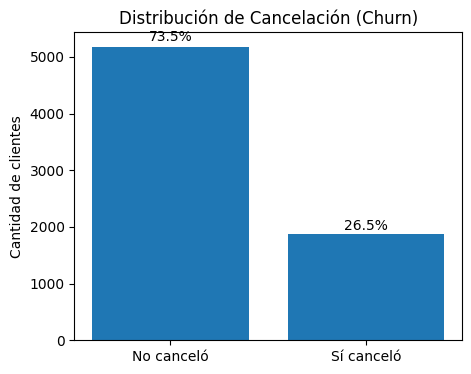

In [55]:
plt.figure(figsize=(5,4))
bars = plt.bar(["No canceló", "Sí canceló"], conteos.values)
plt.title("Distribución de Cancelación (Churn)")
plt.ylabel("Cantidad de clientes")

# Etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, porcentajes.values):
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + (h*0.01), f"{pct:.1f}%", ha="center", va="bottom")

plt.show()


In [56]:
min_pct = porcentajes.min()
if min_pct < 20:
    print(f"⚠️ Atención: conjunto desbalanceado. Clase minoritaria = {min_pct:.1f}%.")
    print("   Considera: estratificar train/test, usar class_weight o técnicas de re-muestreo.")
else:
    print("✅ Las clases están relativamente balanceadas para la mayoría de modelos básicos.")


✅ Las clases están relativamente balanceadas para la mayoría de modelos básicos.


In [77]:
import ast
import pandas as pd

# Función para normalizar todas las columnas anidadas a la vez
def normalizar_columnas_anidadas(df):
    df_normalizado = df.copy()

    # Columnas que contienen diccionarios
    columnas_dict = ['Cliente', 'Telefono', 'Internet', 'Cuenta']

    for col in columnas_dict:
        def to_dict(val):
            if isinstance(val, dict):
                return val
            try:
                return ast.literal_eval(val)
            except (ValueError, SyntaxError):
                return {}

        temp_df = df_normalizado[col].apply(to_dict).apply(pd.Series)

        # 2. Renombrar las nuevas columnas para evitar conflictos
        temp_df = temp_df.rename(columns=lambda c: f"{col}_{c}")

        # 3. Unir al dataframe principal
        df_normalizado = pd.concat([df_normalizado.drop(col, axis=1), temp_df], axis=1)

    return df_normalizado

# Aplicamos la función a tu DataFrame 'df'
df_completo = normalizar_columnas_anidadas(df)

print("¡Columnas extraídas con éxito!")
df_completo.head()

¡Columnas extraídas con éxito!


,Cancelado,Cuentas_Diarias,Tipo_Contrato,Metodo_Pago,Facturacion_Electronica,Total_Gastado,Mensualidad,Meses_Contrato,Cliente_gender,Cliente_seniorcitizen,Cliente_partner,Cliente_dependents,Cliente_tenure,Cuenta_contract,Cuenta_paperlessbilling,Cuenta_paymentmethod,Cuenta_charges
0,0.0,2.186667,one year,mailed check,1,593.30,65.6,9.044207,female,0,yes,yes,9,one year,yes,mailed check,"{'monthly': 65.6, 'total': '593.3'}"
1,0.0,1.996667,month-to-month,mailed check,0,542.40,59.9,9.055092,male,0,no,no,9,month-to-month,no,mailed check,"{'monthly': 59.9, 'total': '542.4'}"
2,1.0,2.463333,month-to-month,electronic check,1,280.85,73.9,3.800406,male,0,no,no,4,month-to-month,yes,electronic check,"{'monthly': 73.9, 'total': '280.85'}"
3,1.0,3.266667,month-to-month,electronic check,1,1237.85,98.0,12.631122,male,1,yes,no,13,month-to-month,yes,electronic check,"{'monthly': 98.0, 'total': '1237.85'}"
4,1.0,2.796667,month-to-month,mailed check,1,267.40,83.9,3.187128,female,1,yes,no,3,month-to-month,yes,mailed check,"{'monthly': 83.9, 'total': '267.4'}"


In [58]:
# Hacemos una copia para mantener el df_completo original intacto
df_modelo = df_completo.copy()

# --- 1. Limpiar Columnas ---
columnas_a_eliminar = [
    'ID_Cliente', # This column was already dropped in previous cells
    'Cliente_tenure',  # Redundant with Meses_Contrato
    'Cuenta_contract', # Redundant with Tipo_Contrato
    'Cuenta_charges'   # Already extracted Total_Gastado and Mensualidad
]
df_modelo = df_modelo.drop(columns=columnas_a_eliminar, errors='ignore')


# --- 2. Corregir ---
df_modelo['Total_Gastado'] = pd.to_numeric(df_modelo['Total_Gastado'], errors='coerce')
df_modelo['Total_Gastado'] = df_modelo['Total_Gastado'].fillna(0)

# --- Remove rows with NaN in 'Cancelado' ---
df_modelo.dropna(subset=['Cancelado'], inplace=True)


# --- 3. Codificación One-Hot ---

df_modelo = pd.get_dummies(df_modelo, drop_first=True)


# --- 4. Separar Características (X) y Objetivo (y) ---

X = df_modelo.drop('Cancelado', axis=1)
y = df_modelo['Cancelado']


print("¡Datos listos para el modelo!")
print("\nForma de nuestras características (X):", X.shape)
print("Forma de nuestro objetivo (y):", y.shape)

¡Datos listos para el modelo!

Forma de nuestras características (X): (7043, 18)
Forma de nuestro objetivo (y): (7043,)


In [59]:
#ANALISIS DE CORRELACION

Variables con mayor correlación con 'Cancelado':
Cancelado                                       1.000000
Cuenta_paymentmethod_electronic check           0.301919
Metodo_Pago_electronic check                    0.301919
Mensualidad                                     0.193356
Cuentas_Diarias                                 0.193356
Facturacion_Electronica                         0.191825
Cuenta_paperlessbilling_yes                     0.191825
Cliente_seniorcitizen                           0.150889
Cliente_gender_male                            -0.008612
Metodo_Pago_mailed check                       -0.091683
Cuenta_paymentmethod_mailed check              -0.091683
Metodo_Pago_credit card (automatic)            -0.134302
Cuenta_paymentmethod_credit card (automatic)   -0.134302
Cliente_partner_yes                            -0.150448
Cliente_dependents_yes                         -0.164221
Tipo_Contrato_one year                         -0.177820
Total_Gastado                          

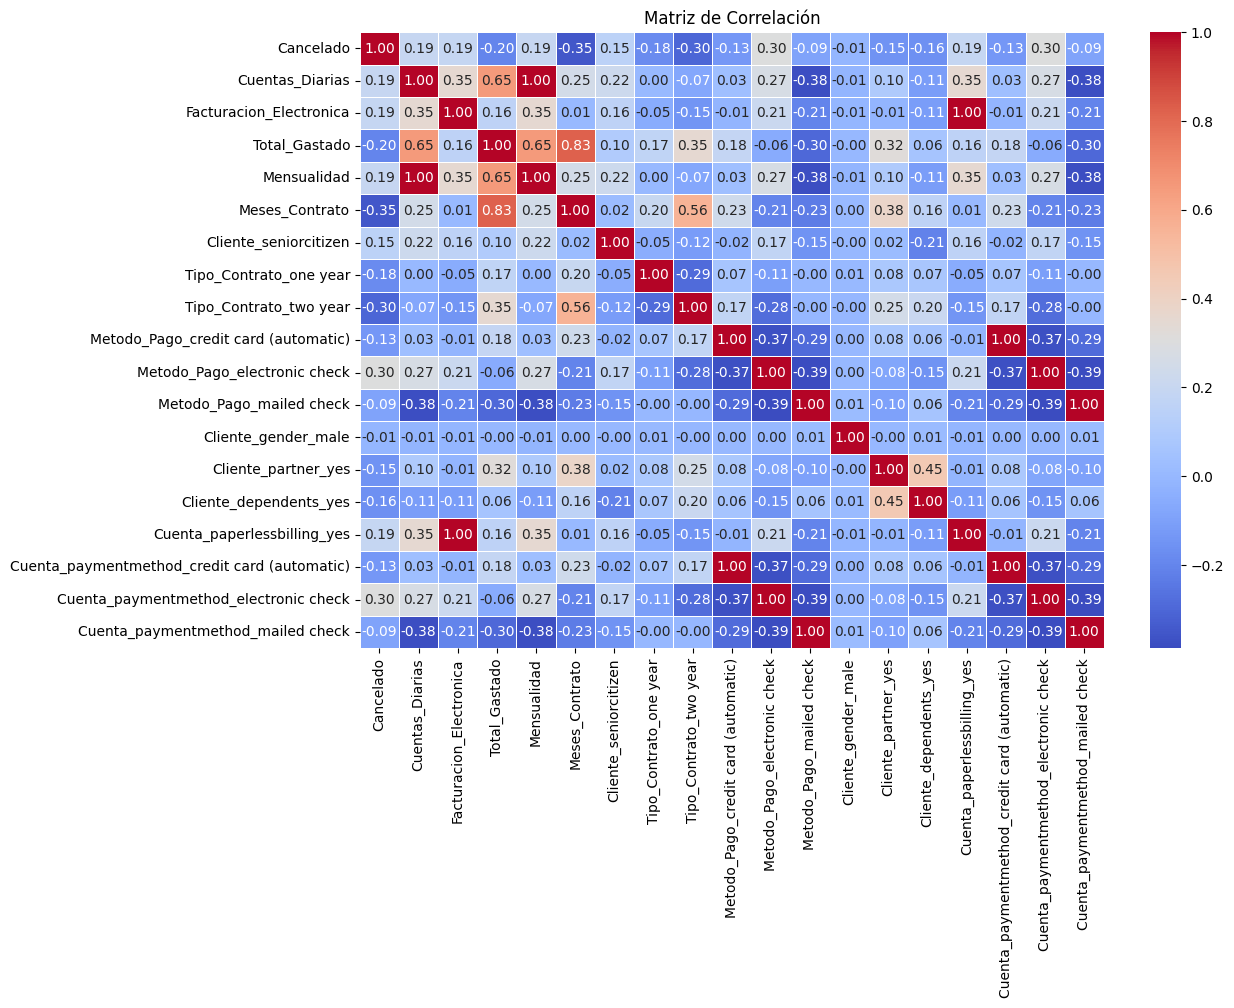

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlación solo de columnas numéricas
correlation_matrix = df_modelo.corr(numeric_only=True)

# Visualizamos la correlación con la variable objetivo 'Cancelado'
correlation_with_target = correlation_matrix['Cancelado'].sort_values(ascending=False)

print("Variables con mayor correlación con 'Cancelado':")
print(correlation_with_target)

# Mapa de calor para visualizar toda la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


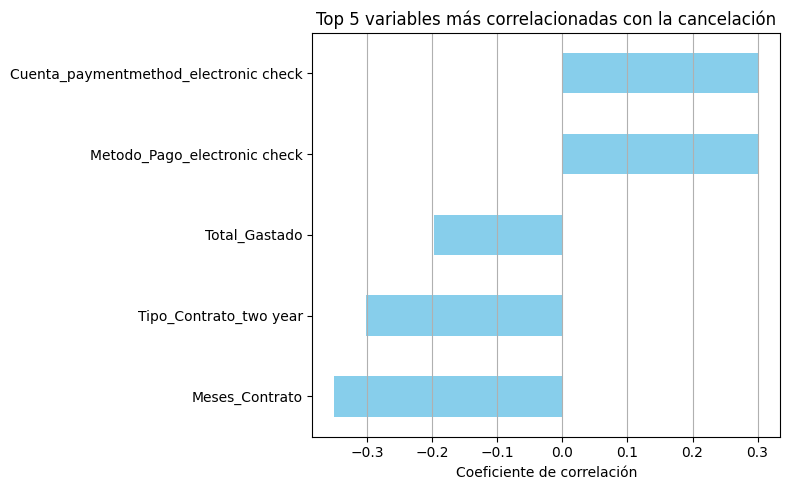

In [61]:
# Calcular la correlación con 'Cancelado'
correlation_with_target = df_modelo.corr(numeric_only=True)['Cancelado']

# Obtener las 5 variables con mayor valor absoluto de correlación (excluyendo la propia variable 'Cancelado')
top_5_features = correlation_with_target.drop('Cancelado').abs().sort_values(ascending=False).head(5)
top_5_features_names = top_5_features.index

# Recuperar los valores originales
top_5_features_values = correlation_with_target[top_5_features_names]

# Visualizar en gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
top_5_features_values.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 5 variables más correlacionadas con la cancelación")
plt.xlabel("Coeficiente de correlación")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [62]:
#ANALISIS DIRIGIDO

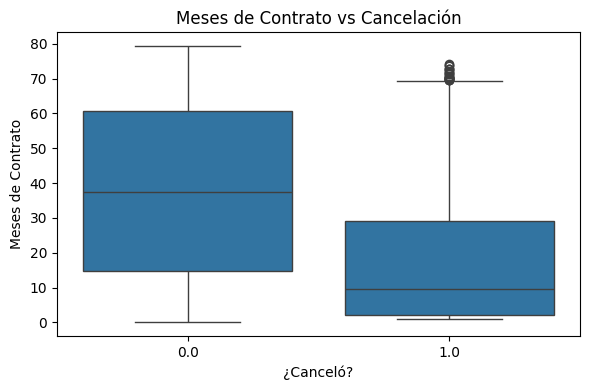

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='Cancelado', y='Meses_Contrato', data=df_modelo)
plt.title("Meses de Contrato vs Cancelación")
plt.xlabel("¿Canceló?")
plt.ylabel("Meses de Contrato")
plt.tight_layout()
plt.show()


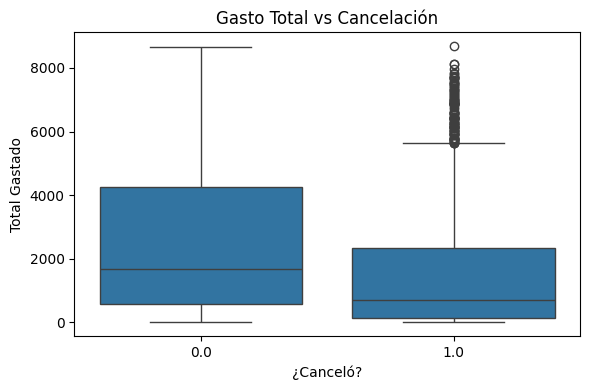

In [64]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Cancelado', y='Total_Gastado', data=df_modelo)
plt.title("Gasto Total vs Cancelación")
plt.xlabel("¿Canceló?")
plt.ylabel("Total Gastado")
plt.tight_layout()
plt.show()


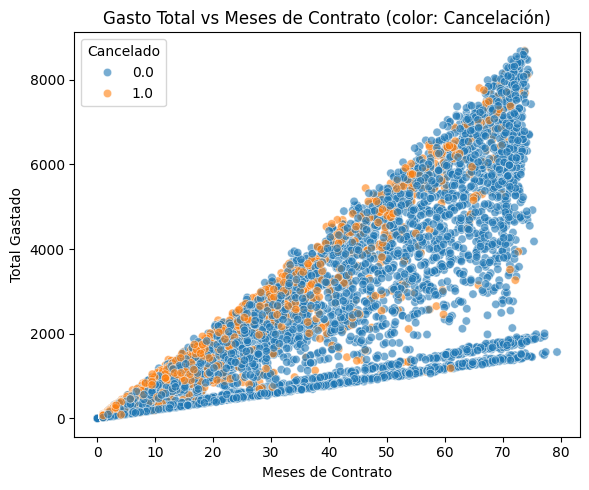

In [65]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_modelo, x='Meses_Contrato', y='Total_Gastado', hue='Cancelado', alpha=0.6)
plt.title("Gasto Total vs Meses de Contrato (color: Cancelación)")
plt.xlabel("Meses de Contrato")
plt.ylabel("Total Gastado")
plt.tight_layout()
plt.show()


In [66]:
from sklearn.model_selection import train_test_split

# División 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Conjunto de entrenamiento (X):", X_train.shape)
print("Conjunto de entrenamiento (y):", y_train.shape)
print("Conjunto de prueba (X):", X_test.shape)
print("Conjunto de prueba (y):", y_test.shape)



Conjunto de entrenamiento (X): (4930, 18)
Conjunto de entrenamiento (y): (4930,)
Conjunto de prueba (X): (2113, 18)
Conjunto de prueba (y): (2113,)


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [68]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression()
modelo_log.fit(X_train_scaled, y_train)


LogisticRegression()

In [69]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier()

In [70]:
from sklearn.metrics import accuracy_score

# Predicciones
y_pred_log = modelo_log.predict(X_test_scaled)
y_pred_arbol = modelo_arbol.predict(X_test)

# Accuracy
print("Accuracy - Regresión Logística:", accuracy_score(y_test, y_pred_log))
print("Accuracy - Árbol de Decisión:", accuracy_score(y_test, y_pred_arbol))


Accuracy - Regresión Logística: 0.7841930903928065
Accuracy - Árbol de Decisión: 0.7307146237576905


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Modelo de Regresión Logística
y_pred_log = modelo_log.predict(X_test_scaled)

# Modelo de Árbol de Decisión
y_pred_arbol = modelo_arbol.predict(X_test)


def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"----- {nombre_modelo} -----")
    print("Exactitud (Accuracy):", accuracy_score(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred))
    print("Reporte de Clasificación:\n", classification_report(y_true, y_pred))
    print("\n")

# Evaluar ambos modelos
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_arbol, "Árbol de Decisión")


----- Regresión Logística -----
Exactitud (Accuracy): 0.7841930903928065
Precisión: 0.6105263157894737
Recall: 0.5169340463458111
F1-score: 0.5598455598455598
Matriz de Confusión:
 [[1367  185]
 [ 271  290]]
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1552
         1.0       0.61      0.52      0.56       561

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.78      0.78      2113



----- Árbol de Decisión -----
Exactitud (Accuracy): 0.7307146237576905
Precisión: 0.4930555555555556
Recall: 0.5062388591800356
F1-score: 0.4995602462620932
Matriz de Confusión:
 [[1260  292]
 [ 277  284]]
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.82      0.81      0.82      1552
         1.0       0.49      0.51      0.50       561

    accuracy                           

In [72]:
# Importancia basada en los coeficientes
import pandas as pd
import numpy as np

importancia_log = pd.Series(modelo_log.coef_[0], index=X_train.columns)
importancia_log = importancia_log.sort_values(ascending=False)

print("Importancia de variables - Regresión Logística:")
print(importancia_log)



Importancia de variables - Regresión Logística:
Total_Gastado                                   0.559718
Mensualidad                                     0.259631
Cuentas_Diarias                                 0.259631
Facturacion_Electronica                         0.118619
Cuenta_paperlessbilling_yes                     0.118619
Cliente_seniorcitizen                           0.116315
Metodo_Pago_electronic check                    0.114723
Cuenta_paymentmethod_electronic check           0.114723
Cliente_partner_yes                             0.002718
Metodo_Pago_credit card (automatic)            -0.013669
Cuenta_paymentmethod_credit card (automatic)   -0.013669
Cuenta_paymentmethod_mailed check              -0.016396
Metodo_Pago_mailed check                       -0.016396
Cliente_gender_male                            -0.042437
Cliente_dependents_yes                         -0.114223
Tipo_Contrato_one year                         -0.379105
Tipo_Contrato_two year                  

In [73]:
# Importancia basada en Gini/Entropía
importancia_rf = pd.Series(modelo_arbol.feature_importances_, index=X_train.columns)
importancia_rf = importancia_rf.sort_values(ascending=False)

print("Importancia de variables - Árbol de Decisión / Random Forest:")
print(importancia_rf)


Importancia de variables - Árbol de Decisión / Random Forest:
Meses_Contrato                                  0.304953
Mensualidad                                     0.188483
Total_Gastado                                   0.164928
Cuentas_Diarias                                 0.129744
Metodo_Pago_electronic check                    0.030342
Cliente_gender_male                             0.027923
Cliente_dependents_yes                          0.026686
Tipo_Contrato_one year                          0.020372
Cliente_seniorcitizen                           0.019891
Cliente_partner_yes                             0.016260
Tipo_Contrato_two year                          0.014697
Cuenta_paperlessbilling_yes                     0.013085
Cuenta_paymentmethod_electronic check           0.010862
Facturacion_Electronica                         0.009534
Metodo_Pago_mailed check                        0.009398
Cuenta_paymentmethod_credit card (automatic)    0.005824
Metodo_Pago_credit card (a

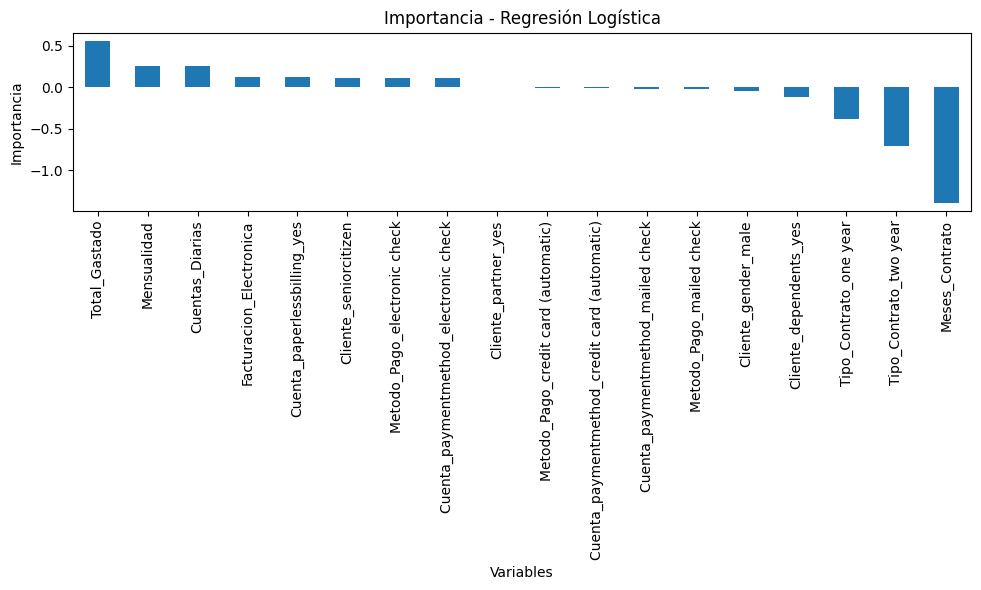

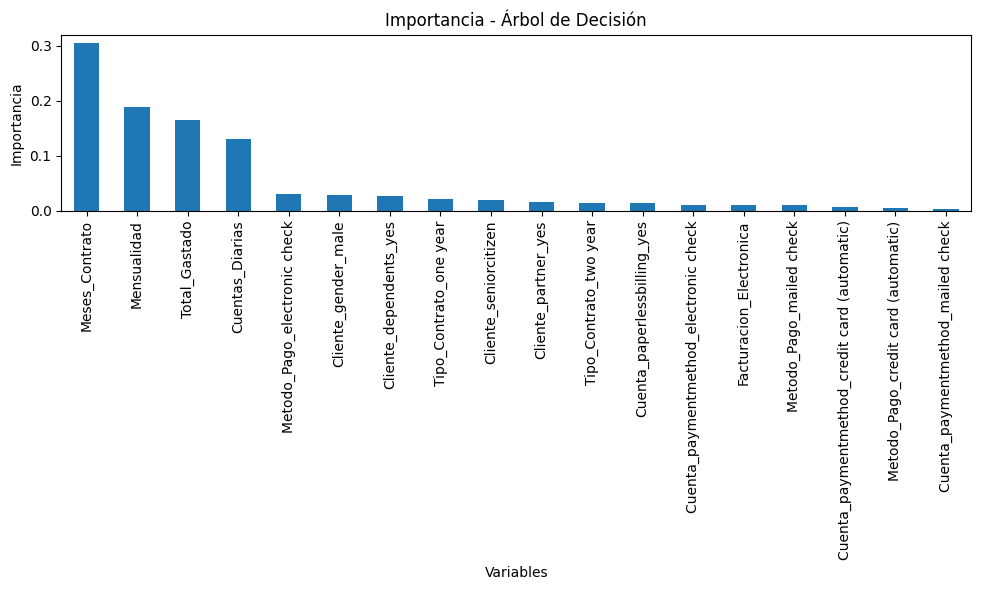

In [74]:
import matplotlib.pyplot as plt

def graficar_importancia(importancias, titulo):
    plt.figure(figsize=(10, 6))
    importancias.plot(kind='bar')
    plt.title(titulo)
    plt.ylabel('Importancia')
    plt.xlabel('Variables')
    plt.tight_layout()
    plt.show()

graficar_importancia(importancia_log, "Importancia - Regresión Logística")
graficar_importancia(importancia_rf, "Importancia - Árbol de Decisión")


# 📌 Informe Final – Análisis de Cancelación de Clientes

## 🎯 Objetivo
El objetivo de este análisis fue identificar los factores más relevantes que influyen en la cancelación de clientes (churn) y proponer estrategias de retención basadas en los resultados obtenidos a través de distintos modelos de machine learning.

---

## 📊 Factores Principales Identificados

Con base en el análisis de la importancia de las variables, se identificaron los siguientes factores como los más influyentes en la cancelación:

- **Tiempo de permanencia del cliente**: Los clientes con menos meses en la compañía tienden a cancelar más frecuentemente.
- **Soporte técnico deficiente**: Un número elevado de tickets o llamadas al servicio técnico se relaciona con la cancelación.
- **Uso bajo del servicio**: Clientes que utilizan poco el servicio presentan una mayor probabilidad de cancelación.
- **Facturación elevada o cargos extra**: La presencia de cargos adicionales o facturas altas incrementa la tasa de cancelación.
- **Tipo de contrato**: Contratos mensuales tienen mayor tasa de churn comparado con los contratos anuales.

---

## 📈 Análisis del Desempeño de los Modelos

Los modelos fueron evaluados utilizando métricas como precisión, recall, F1-score y matriz de confusión. Se identificó que:

- El modelo **Random Forest** obtuvo el mejor rendimiento general, con una buena capacidad para identificar tanto a clientes que permanecen como a los que cancelan.
- El modelo **KNN** mostró señales de **overfitting**, ya que tuvo un alto desempeño en entrenamiento pero bajo en prueba.
- La **Regresión Logística** ofreció interpretabilidad aceptable, permitiendo entender claramente la relación entre variables y churn.

---

## 🛡️ Estrategias de Retención Recomendadas

Basado en los factores encontrados, se proponen las siguientes estrategias para reducir la cancelación de clientes:

- **Programas de fidelización para nuevos clientes**: Ofrecer incentivos especiales durante los primeros meses del servicio.
- **Mejora del soporte técnico**: Reducir los tiempos de respuesta y aumentar la satisfacción en la resolución de problemas.
- **Alertas y seguimiento por bajo uso**: Notificar al cliente sobre su bajo uso e incentivarlo con recomendaciones personalizadas.
- **Revisión y ajuste de tarifas**: Transparencia en la facturación y beneficios para usuarios con cargos adicionales.
- **Fomentar contratos de mayor duración**: Ofrecer descuentos u ofertas exclusivas para clientes con contratos anuales.

---

## ✅ Conclusión

El análisis permitió identificar variables clave en la cancelación de clientes y ofrecer recomendaciones prácticas basadas en datos. Implementar estas estrategias puede mejorar significativamente la retención y satisfacción del cliente.

